## Transforming Parking Meter CSV files

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [391]:
#we're going to read each CSV file and then create a "date" field
df_2018 = pd.read_csv('treas_meters_2018_pole_by_mo_day_datasd.csv')
df_2018['year'] = 2018
df_2018['date'] = pd.to_datetime(df_2018[['year','month','day']])

df_2019 = pd.read_csv('treas_meters_2019_pole_by_mo_day_datasd.csv')
df_2019['year'] = 2019
df_2019['date'] = pd.to_datetime(df_2019[['year','month','day']])

df_2020 = pd.read_csv('treas_meters_2020_pole_by_mo_day_datasd.csv')
df_2020['year'] = 2020
df_2020['date'] = pd.to_datetime(df_2020[['year','month','day']])
df_2020['sum_trans_amt'] = df_2020['sum_trans_amt'] / 100

df_2021 = pd.read_csv('treas_meters_2021_pole_by_mo_day_datasd.csv')
df_2021['year'] = 2021
df_2021['date'] = pd.to_datetime(df_2021[['year','month','day']])
df_2021['sum_trans_amt'] = df_2021['sum_trans_amt'] / 100

df_2022 = pd.read_csv('treas_meters_2022_pole_by_mo_day_datasd.csv')
df_2022['year'] = 2022
df_2022['date'] = pd.to_datetime(df_2022[['year','month','day']])
df_2022['sum_trans_amt'] = df_2022['sum_trans_amt'] / 100

df_2023 = pd.read_csv('treas_meters_2023_pole_by_mo_day_datasd.csv')
df_2023['year'] = 2023
df_2023['date'] = pd.to_datetime(df_2023[['year','month','day']])
df_2023['sum_trans_amt'] = df_2023['sum_trans_amt'] / 100



In [392]:
#join all dataframes together and revise the index
main_df = pd.concat([df_2018,df_2019,df_2020,df_2021,df_2022, df_2023])

main_df.reset_index(inplace=True)

main_df.drop(columns='index')

,pole_id,month,day,sum_trans_amt,num_trans,year,date
0,1-1004,1,2,7.20,7,2018,2018-01-02
1,1-1004,1,3,4.50,8,2018,2018-01-03
2,1-1004,1,4,4.00,6,2018,2018-01-04
3,1-1004,1,5,7.40,10,2018,2018-01-05
4,1-1004,1,6,9.50,9,2018,2018-01-06
...,...,...,...,...,...,...,...
5750613,WUV-119,11,21,6.15,6,2023,2023-11-21
5750614,WUV-119,11,22,2.80,4,2023,2023-11-22
5750615,WUV-119,11,24,2.35,4,2023,2023-11-24
5750616,WUV-119,11,25,4.75,4,2023,2023-11-25


In [393]:
#main_df['per_transaction_amt'] = main_df['sum_trans_amt'] / main_df['num_trans']

## Creating separate dataframes for Daily Total Amount, Daily Transactions, ~Daily Amount Per Transaction~

The parking meter data is structured in a way that's not compatible with the weather information, so we need to pivot the data such that each `pole_id` is its own column / feature

In [394]:
transactions_df = main_df.pivot(index='date',columns='pole_id', values='num_trans')
transactions_df.reset_index(inplace=True)

transactions_df

pole_id,date,1-1004,1-1006,1-1008,1-1020,1-1310,1-1312,1-1313,1-1314,1-1315,...,WT-412,WT-414,WUV-111,WUV-113,WUV-114,WUV-115,WUV-116,WUV-117,WUV-118,WUV-119
0,2018-01-01,NaN,10.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,7.0,13.0,1.0,8.0,5.0,16.0,14.0,14.0,10.0,...,4.0,8.0,7.0,3.0,2.0,9.0,15.0,6.0,7.0,4.0
2,2018-01-03,8.0,10.0,3.0,9.0,8.0,6.0,6.0,9.0,18.0,...,5.0,7.0,9.0,4.0,7.0,8.0,2.0,9.0,7.0,6.0
3,2018-01-04,6.0,11.0,10.0,6.0,10.0,8.0,21.0,15.0,11.0,...,10.0,10.0,7.0,2.0,10.0,5.0,4.0,6.0,5.0,5.0
4,2018-01-05,10.0,5.0,16.0,13.0,6.0,8.0,6.0,10.0,7.0,...,12.0,6.0,13.0,7.0,7.0,11.0,4.0,4.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2023-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2043,2023-11-24,7.0,6.0,2.0,NaN,6.0,2.0,1.0,6.0,NaN,...,NaN,NaN,NaN,12.0,8.0,3.0,NaN,1.0,2.0,4.0
2044,2023-11-25,6.0,2.0,2.0,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,5.0,2.0,1.0,3.0,11.0,2.0,4.0
2045,2023-11-26,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
amount_df = main_df.pivot(index='date',columns='pole_id', values='sum_trans_amt')
amount_df.reset_index(inplace=True)

amount_df

pole_id,date,1-1004,1-1006,1-1008,1-1020,1-1310,1-1312,1-1313,1-1314,1-1315,...,WT-412,WT-414,WUV-111,WUV-113,WUV-114,WUV-115,WUV-116,WUV-117,WUV-118,WUV-119
0,2018-01-01,NaN,1.50,NaN,NaN,NaN,NaN,NaN,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,7.20,8.95,1.25,5.55,9.00,7.70,10.50,5.45,10.90,...,7.25,8.10,8.50,5.10,4.25,5.00,9.40,3.55,8.05,2.60
2,2018-01-03,4.50,12.50,6.75,3.30,8.55,5.15,8.50,8.65,10.30,...,5.25,5.80,7.55,6.10,8.25,6.30,1.35,5.65,4.35,6.90
3,2018-01-04,4.00,9.50,10.40,4.55,8.30,11.25,10.35,10.00,9.95,...,8.20,7.60,9.85,1.25,4.95,5.75,5.40,5.55,8.75,6.50
4,2018-01-05,7.40,4.05,12.55,3.35,7.25,7.10,5.25,5.55,7.90,...,8.65,6.15,8.10,2.95,8.35,5.45,8.75,4.40,8.55,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2023-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2043,2023-11-24,8.50,9.50,1.60,NaN,1.60,3.30,2.50,4.70,NaN,...,NaN,NaN,NaN,7.65,2.60,2.00,NaN,0.25,3.00,2.35
2044,2023-11-25,8.10,3.75,2.75,NaN,NaN,NaN,2.50,3.50,NaN,...,NaN,NaN,NaN,4.30,5.00,2.50,2.25,5.65,3.10,4.75
2045,2023-11-26,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
#percapita_df = main_df.pivot(index='date',columns='pole_id', values='per_transaction_amt')
#percapita_df.reset_index(inplace=True)

#percapita_df

## Pulling in weather information

In [397]:
weather_df = pd.read_csv("sd_2018_2023.csv")
weather_df = weather_df[['date','PRCP','TAVG','TMAX','TMIN']]

weather_df['date'] = pd.to_datetime(weather_df['date'])

weather_df

,date,PRCP,TAVG,TMAX,TMIN
0,2018-01-01,0.0,13.8,18.9,10.6
1,2018-01-02,0.0,15.8,22.2,12.2
2,2018-01-03,0.0,16.4,19.4,13.3
3,2018-01-04,0.0,16.6,21.1,12.2
4,2018-01-05,0.0,17.4,22.8,13.3
...,...,...,...,...,...
2151,2023-11-22,0.0,17.2,25.6,10.0
2152,2023-11-23,0.0,16.2,20.0,10.6
2153,2023-11-24,0.3,17.4,18.9,12.8
2154,2023-11-25,0.0,15.0,19.4,10.0


In [398]:
transactions_df = weather_df.merge(transactions_df,on='date', how='left')
amount_df = weather_df.merge(amount_df,on='date', how='left')
#percapita_df = weather_df.merge(percapita_df,on='date', how='left')

In [399]:
transactions_df.head()

,date,PRCP,TAVG,TMAX,TMIN,1-1004,1-1006,1-1008,1-1020,1-1310,...,WT-412,WT-414,WUV-111,WUV-113,WUV-114,WUV-115,WUV-116,WUV-117,WUV-118,WUV-119
0,2018-01-01,0.0,13.8,18.9,10.6,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,0.0,15.8,22.2,12.2,7.0,13.0,1.0,8.0,5.0,...,4.0,8.0,7.0,3.0,2.0,9.0,15.0,6.0,7.0,4.0
2,2018-01-03,0.0,16.4,19.4,13.3,8.0,10.0,3.0,9.0,8.0,...,5.0,7.0,9.0,4.0,7.0,8.0,2.0,9.0,7.0,6.0
3,2018-01-04,0.0,16.6,21.1,12.2,6.0,11.0,10.0,6.0,10.0,...,10.0,10.0,7.0,2.0,10.0,5.0,4.0,6.0,5.0,5.0
4,2018-01-05,0.0,17.4,22.8,13.3,10.0,5.0,16.0,13.0,6.0,...,12.0,6.0,13.0,7.0,7.0,11.0,4.0,4.0,7.0,5.0


### Fill in the null values with 0

In [400]:
#fill missing values
transactions_df = transactions_df.fillna(0)
amount_df = amount_df.fillna(0)
#percapita_df = percapita_df.fillna(0)

transactions_df.head()

,date,PRCP,TAVG,TMAX,TMIN,1-1004,1-1006,1-1008,1-1020,1-1310,...,WT-412,WT-414,WUV-111,WUV-113,WUV-114,WUV-115,WUV-116,WUV-117,WUV-118,WUV-119
0,2018-01-01,0.0,13.8,18.9,10.6,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,0.0,15.8,22.2,12.2,7.0,13.0,1.0,8.0,5.0,...,4.0,8.0,7.0,3.0,2.0,9.0,15.0,6.0,7.0,4.0
2,2018-01-03,0.0,16.4,19.4,13.3,8.0,10.0,3.0,9.0,8.0,...,5.0,7.0,9.0,4.0,7.0,8.0,2.0,9.0,7.0,6.0
3,2018-01-04,0.0,16.6,21.1,12.2,6.0,11.0,10.0,6.0,10.0,...,10.0,10.0,7.0,2.0,10.0,5.0,4.0,6.0,5.0,5.0
4,2018-01-05,0.0,17.4,22.8,13.3,10.0,5.0,16.0,13.0,6.0,...,12.0,6.0,13.0,7.0,7.0,11.0,4.0,4.0,7.0,5.0


In [401]:
transactions_df[1035:].to_csv('daily_transactions_by_pole.csv')
amount_df[1035:].to_csv('daily_amount_by_pole.csv')


### Sum all transactions and money by day

In [402]:
transactions_df['transactions'] = pd.DataFrame(transactions_df.drop(columns=['date','PRCP','TAVG','TMAX','TMIN']).sum(axis=1))
amount_df['transactions'] = pd.DataFrame(amount_df.drop(columns=['date','PRCP','TAVG','TMAX','TMIN']).sum(axis=1))
#percapita_df['total'] = amount_df['total'] / transactions_df['total']

transactions_df = transactions_df[['date','PRCP','TAVG','TMAX','TMIN','transactions']]
amount_df = amount_df[['date','PRCP','TAVG','TMAX','TMIN','transactions']]

In [404]:
transactions_df['dollar_amount'] = amount_df['transactions']
transactions_df

,date,PRCP,TAVG,TMAX,TMIN,transactions,dollar_amount
0,2018-01-01,0.0,13.8,18.9,10.6,1332.0,204.30
1,2018-01-02,0.0,15.8,22.2,12.2,34094.0,33024.55
2,2018-01-03,0.0,16.4,19.4,13.3,35104.0,34259.14
3,2018-01-04,0.0,16.6,21.1,12.2,36098.0,35627.75
4,2018-01-05,0.0,17.4,22.8,13.3,36553.0,36737.15
...,...,...,...,...,...,...,...
2151,2023-11-22,0.0,17.2,25.6,10.0,17183.0,24783.07
2152,2023-11-23,0.0,16.2,20.0,10.6,181.0,46.20
2153,2023-11-24,0.3,17.4,18.9,12.8,13007.0,19177.49
2154,2023-11-25,0.0,15.0,19.4,10.0,15388.0,24139.33


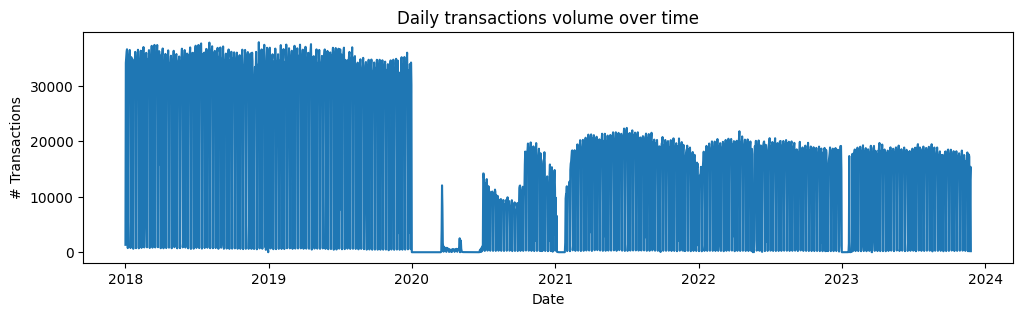

In [343]:
plt.figure(figsize=(12,3))
sns.lineplot(x=transactions_df['date'], y=transactions_df['transactions'])
plt.title("Daily transactions volume over time")
plt.ylabel("# Transactions")
plt.xlabel('Date');

<Axes: xlabel='date', ylabel='transactions'>

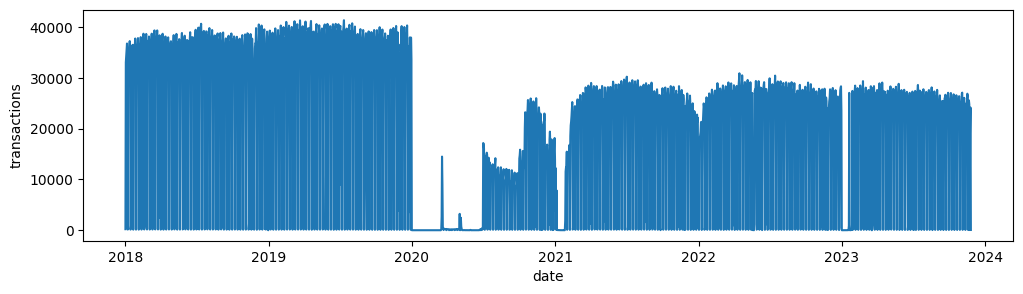

In [344]:
plt.figure(figsize=(12,3))
sns.lineplot(x=amount_df['date'], y=amount_df['transactions'])

In [345]:
transactions_df[1126:]

,date,PRCP,TAVG,TMAX,TMIN,transactions
1126,2021-01-31,0.0,12.7,20.0,7.2,210.0
1127,2021-02-01,0.0,16.6,22.2,13.9,11008.0
1128,2021-02-02,0.0,16.8,19.4,14.4,11090.0
1129,2021-02-03,0.0,14.9,16.7,12.8,11658.0
1130,2021-02-04,0.0,15.2,17.2,11.7,11391.0
...,...,...,...,...,...,...
2151,2023-11-22,0.0,17.2,25.6,10.0,17183.0
2152,2023-11-23,0.0,16.2,20.0,10.6,181.0
2153,2023-11-24,0.3,17.4,18.9,12.8,13007.0
2154,2023-11-25,0.0,15.0,19.4,10.0,15388.0


### Restrict date range to January 31, 2021 and later

In [346]:
#restrict date range to 1/1/2021 and later
transactions_df = transactions_df[1126:].reset_index(drop=True)
amount_df = amount_df[1126:].reset_index(drop=True)
#percapita_df = percapita_df[1035:].reset_index()

transactions_df

,date,PRCP,TAVG,TMAX,TMIN,transactions
0,2021-01-31,0.0,12.7,20.0,7.2,210.0
1,2021-02-01,0.0,16.6,22.2,13.9,11008.0
2,2021-02-02,0.0,16.8,19.4,14.4,11090.0
3,2021-02-03,0.0,14.9,16.7,12.8,11658.0
4,2021-02-04,0.0,15.2,17.2,11.7,11391.0
...,...,...,...,...,...,...
1025,2023-11-22,0.0,17.2,25.6,10.0,17183.0
1026,2023-11-23,0.0,16.2,20.0,10.6,181.0
1027,2023-11-24,0.3,17.4,18.9,12.8,13007.0
1028,2023-11-25,0.0,15.0,19.4,10.0,15388.0


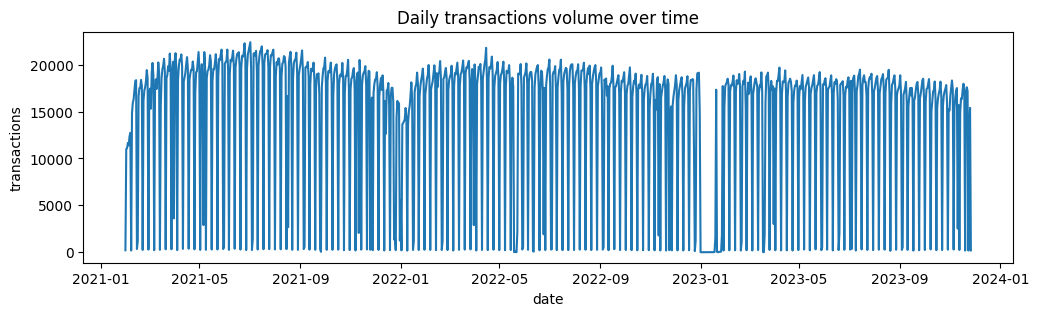

In [347]:
plt.figure(figsize=(12,3))
sns.lineplot(x=transactions_df['date'], y=transactions_df['transactions'])
plt.title("Daily transactions volume over time");

<Axes: xlabel='date', ylabel='transactions'>

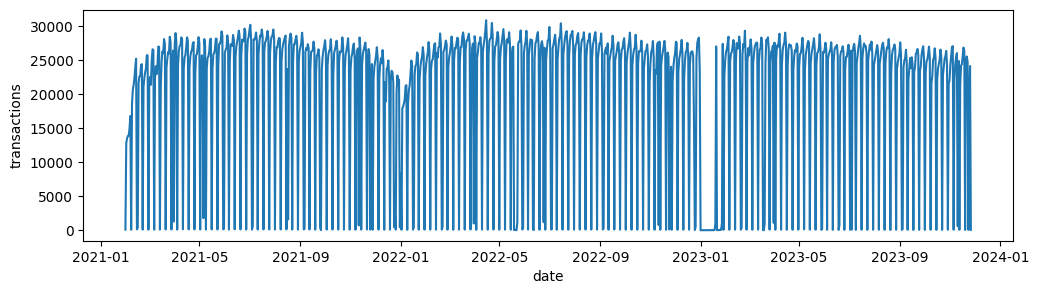

In [348]:
plt.figure(figsize=(12,3))
sns.lineplot(x=amount_df['date'], y=amount_df['transactions'])

### Flag Sundays and holidays with a dummy variable

In [349]:
transactions_df['isSunday'] = [1 if i == 6 else 0 for i in transactions_df['date'].dt.dayofweek]
amount_df['isSunday'] = [1 if i == 6 else 0 for i in amount_df['date'].dt.dayofweek]

transactions_df.head()

,date,PRCP,TAVG,TMAX,TMIN,transactions,isSunday
0,2021-01-31,0.0,12.7,20.0,7.2,210.0,1
1,2021-02-01,0.0,16.6,22.2,13.9,11008.0,0
2,2021-02-02,0.0,16.8,19.4,14.4,11090.0,0
3,2021-02-03,0.0,14.9,16.7,12.8,11658.0,0
4,2021-02-04,0.0,15.2,17.2,11.7,11391.0,0


In [350]:
holiday_dict = {
    '11/11/2020': "Veterans Day",
    '11/26/2020': "Thanksgiving",
    '12/25/2020': "Christmas",
    
    '01/01/2021': 'New Year',
    '01/18/2021': "MLK Jr Day",
    '02/15/2021': "Presidents Day",
    '03/31/2021': "Cesar Chavez Day",
    '05/31/2021': "Memorial Day",
    '06/18/2021': "Juneteenth", #Saturday holiday -> Friday
    '07/05/2021': "4th of July", #Sunday holiday -> Monday
    '09/06/2021': "Labor Day",
    '09/25/2021': "Jewish observance",
    '10/11/2021': "Columbus Day",
    '11/11/2021': "Veterans Day",
    '11/25/2021': "Thanksgiving",
    '12/24/2021': "Christmas Eve",
    '12/25/2021': "Christmas",
    '12/31/2021': "New Year's Eve",
    
    '01/01/2022': 'New Year',
    '01/17/2022': "MLK Jr Day",
    '02/21/2022': "Presidents Day",
    '03/31/2022': "Cesar Chavez Day",
    '05/19/2022': "Special Event",
    '05/20/2022': "Special Event",
    '05/21/2022': "Special Event",
    '05/23/2022': "Special Event",
    '05/30/2022': "Memorial Day",
    '06/20/2022': "Juneteenth", #Sunday holiday -> Monday
    '06/11/2022': 'County fair',
    '06/24/2022': 'SCOTUS protest',
    '07/04/2022': '4th of July',
    '09/05/2022': "Labor Day",
    '10/10/2022': "Columbus Day",
    '11/11/2022': "Veterans Day",
    '11/24/2022': "Thanksgiving",
    '12/26/2022': "Christmas", #Sunday holiday -> Monday
    '12/31/2022': 'New Years Eve',
    
    '01/01/2023': 'New Year',
    '01/16/2023': "MLK Jr Day",
    '02/20/2023': "Presidents Day",
    '03/18/2023': 'St Patricks Day',
    '03/31/2023': "Cesar Chavez Day",
    '05/29/2023': "Memorial Day",
    '06/19/2023': "Juneteenth",
    '07/04/2023': "4th of July",
    '09/04/2023': "Labor Day",
    '10/09/2023': "Columbus Day",
    '11/10/2023': "Veterans Day", #Saturday holiday -> Friday
    '11/23/2023': "Thanksgiving",
    '12/25/2023': "Christmas"
}

#create dataframe
holiday_df = pd.DataFrame.from_dict({ 'day': holiday_dict.keys(), 'Holiday' : holiday_dict.values()})
#convert to datetime
holiday_df['day'] = pd.to_datetime(holiday_df['day'])

holiday_df

,day,Holiday
0,2020-11-11,Veterans Day
1,2020-11-26,Thanksgiving
2,2020-12-25,Christmas
3,2021-01-01,New Year
4,2021-01-18,MLK Jr Day
5,2021-02-15,Presidents Day
6,2021-03-31,Cesar Chavez Day
7,2021-05-31,Memorial Day
8,2021-06-18,Juneteenth
9,2021-07-05,4th of July


In [351]:
def find_holiday(holiday):
    if holiday in holiday_df['day']:
        return 1
    else:
        return 0

In [352]:
transactions_df['isHoliday'] = transactions_df['date'].isin(holiday_df['day']).astype(int)
amount_df['isHoliday'] = amount_df['date'].isin(holiday_df['day']).astype(int)
#percapita_df['holiday'] = percapita_df['date'].isin(holiday_df['day']).astype(int)

In [353]:
transactions_df

,date,PRCP,TAVG,TMAX,TMIN,transactions,isSunday,isHoliday
0,2021-01-31,0.0,12.7,20.0,7.2,210.0,1,0
1,2021-02-01,0.0,16.6,22.2,13.9,11008.0,0,0
2,2021-02-02,0.0,16.8,19.4,14.4,11090.0,0,0
3,2021-02-03,0.0,14.9,16.7,12.8,11658.0,0,0
4,2021-02-04,0.0,15.2,17.2,11.7,11391.0,0,0
...,...,...,...,...,...,...,...,...
1025,2023-11-22,0.0,17.2,25.6,10.0,17183.0,0,0
1026,2023-11-23,0.0,16.2,20.0,10.6,181.0,0,1
1027,2023-11-24,0.3,17.4,18.9,12.8,13007.0,0,0
1028,2023-11-25,0.0,15.0,19.4,10.0,15388.0,0,0


### Temperature scatterplots

Text(0.5, 1.0, 'Relationship between avg temperature and daily transactions')

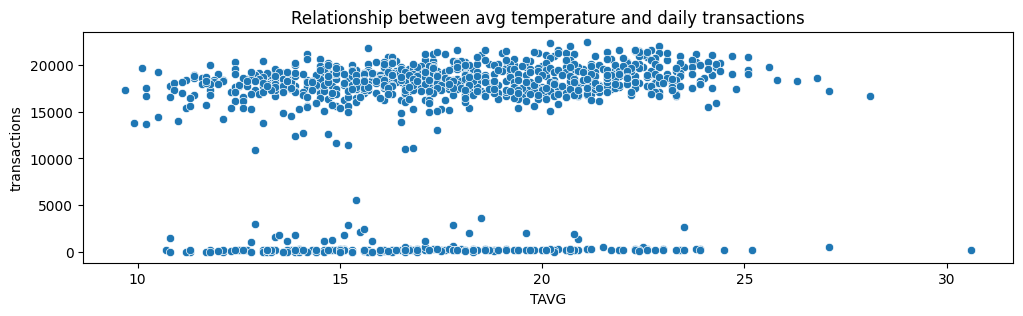

In [354]:
plt.figure(figsize=(12,3))
sns.scatterplot(x=transactions_df['TAVG'], y=transactions_df['transactions'])
plt.title("Relationship between avg temperature and daily transactions")

Text(0.5, 1.0, 'Relationship between avg temperature and daily revenue')

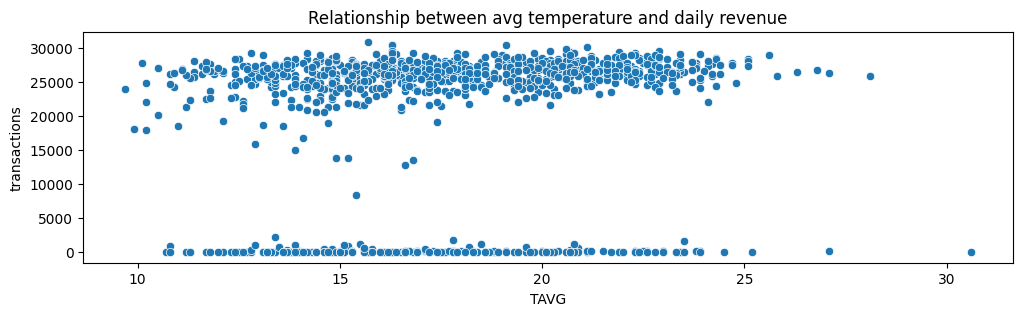

In [355]:
plt.figure(figsize=(12,3))
sns.scatterplot(x=amount_df['TAVG'], y=amount_df['transactions'])
plt.title("Relationship between avg temperature and daily revenue")

In [356]:
#sns.scatterplot(x=percapita_df['TAVG'], y=percapita_df['total'])

### Precipitation scatterplots

<Axes: xlabel='PRCP', ylabel='transactions'>

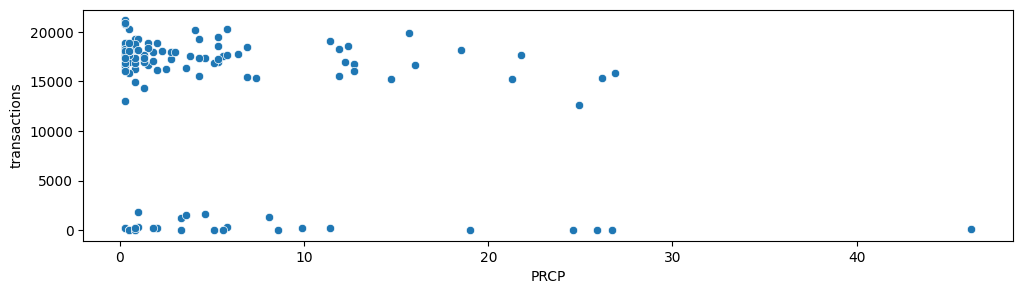

In [357]:
plt.figure(figsize=(12,3))
sns.scatterplot(x=transactions_df[transactions_df['PRCP']>0]['PRCP'], 
                y=transactions_df[transactions_df['PRCP']>0]['transactions'])

<Axes: xlabel='PRCP', ylabel='transactions'>

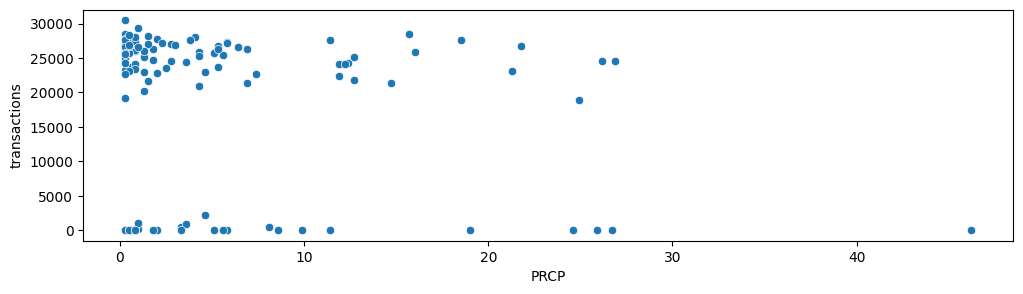

In [358]:
plt.figure(figsize=(12,3))
sns.scatterplot(x=amount_df[amount_df['PRCP']>0]['PRCP'], 
                y=amount_df[amount_df['PRCP']>0]['transactions'])

In [359]:
#sns.scatterplot(x=percapita_df['PRCP'], y=percapita_df['total'])

### Histograms

<Axes: xlabel='transactions', ylabel='Count'>

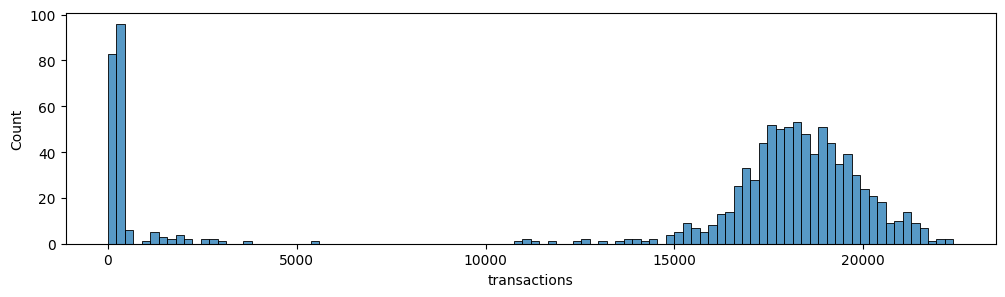

In [360]:
plt.figure(figsize=(12,3))
sns.histplot(transactions_df['transactions'],bins=100)

<Axes: xlabel='transactions', ylabel='Count'>

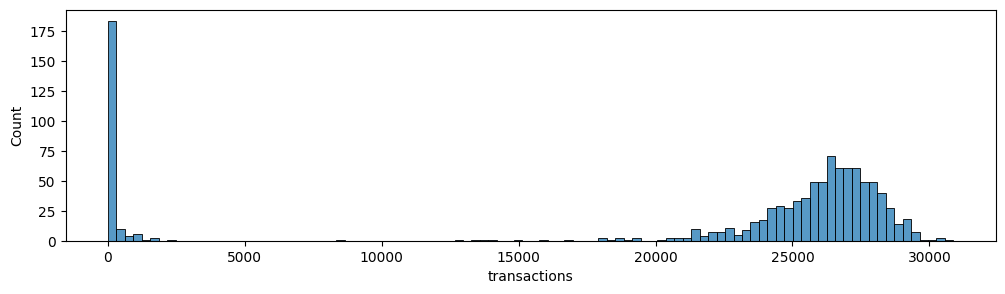

In [361]:
plt.figure(figsize=(12,3))
sns.histplot(amount_df['transactions'],bins=100)

In [362]:
#sns.histplot(percapita_df['total'],bins=100)
#plt.title("I don't think this is correct")

### Rolling averages

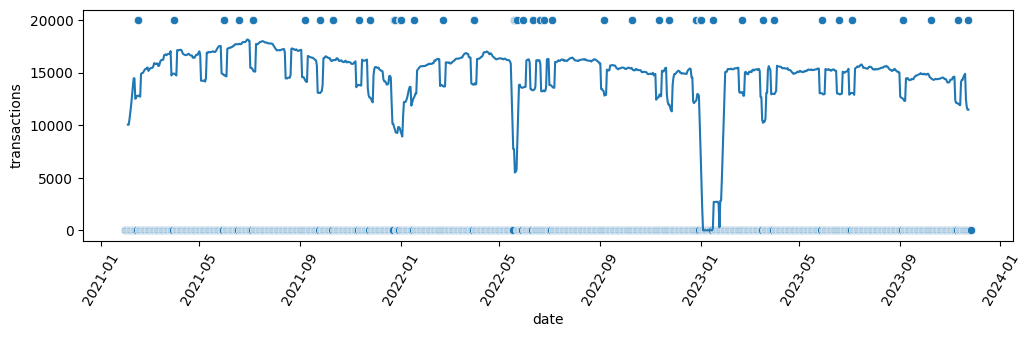

In [363]:
plt.figure(figsize=(12,3))
sns.lineplot(x=transactions_df['date'],y=transactions_df['transactions'].rolling(7,center=True).mean())
ax2 = sns.scatterplot(x=transactions_df['date'], y = transactions_df['isHoliday'] * 20000)

plt.xticks(rotation=60);

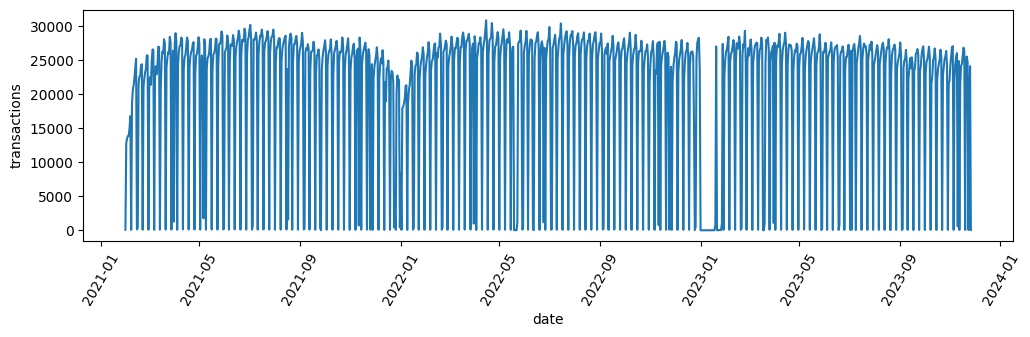

In [364]:
plt.figure(figsize=(12,3))
ax1 = sns.lineplot(x=amount_df['date'],y=amount_df['transactions'].rolling(1, center=True).mean())
#ax2 = sns.scatterplot(x=amount_df['date'], y = amount_df['isHoliday'] * 2500000)
plt.xticks(rotation=60);

In [365]:
#plt.figure(figsize=(12,3))
#sns.lineplot(x=amount_df['date'],y=amount_df['total'].rolling(7).mean())
#plt.xticks(rotation=60);

### Differencing

<Axes: xlabel='date', ylabel='transactions'>

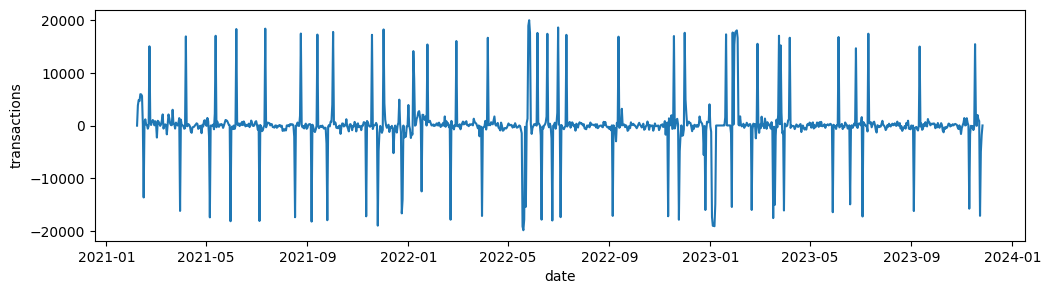

In [366]:
plt.figure(figsize=(12,3))
sns.lineplot( x=transactions_df['date'], y= transactions_df['transactions'].diff(7))

<Axes: xlabel='date', ylabel='transactions'>

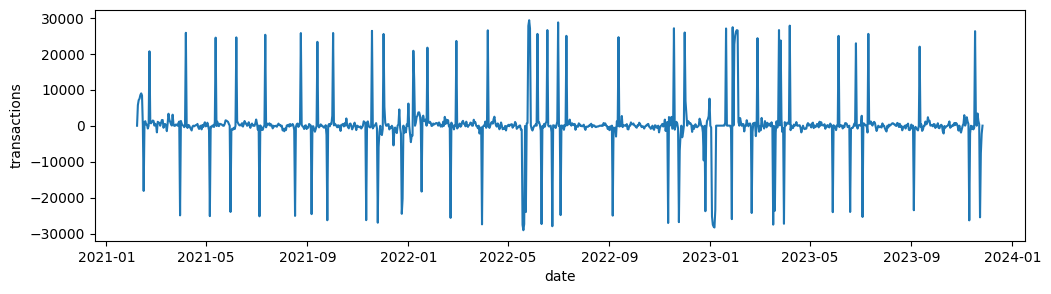

In [367]:
plt.figure(figsize=(12,3))
sns.lineplot( x=amount_df['date'], y= amount_df['transactions'].diff(7))

In [368]:
transactions_df.to_csv('daily_total_transactions.csv')

transactions_df

,date,PRCP,TAVG,TMAX,TMIN,transactions,isSunday,isHoliday
0,2021-01-31,0.0,12.7,20.0,7.2,210.0,1,0
1,2021-02-01,0.0,16.6,22.2,13.9,11008.0,0,0
2,2021-02-02,0.0,16.8,19.4,14.4,11090.0,0,0
3,2021-02-03,0.0,14.9,16.7,12.8,11658.0,0,0
4,2021-02-04,0.0,15.2,17.2,11.7,11391.0,0,0
...,...,...,...,...,...,...,...,...
1025,2023-11-22,0.0,17.2,25.6,10.0,17183.0,0,0
1026,2023-11-23,0.0,16.2,20.0,10.6,181.0,0,1
1027,2023-11-24,0.3,17.4,18.9,12.8,13007.0,0,0
1028,2023-11-25,0.0,15.0,19.4,10.0,15388.0,0,0


In [369]:
amount_df.to_csv('daily_total_amount.csv')

amount_df

,date,PRCP,TAVG,TMAX,TMIN,transactions,isSunday,isHoliday
0,2021-01-31,0.0,12.7,20.0,7.2,83.20,1,0
1,2021-02-01,0.0,16.6,22.2,13.9,12790.22,0,0
2,2021-02-02,0.0,16.8,19.4,14.4,13520.16,0,0
3,2021-02-03,0.0,14.9,16.7,12.8,13841.36,0,0
4,2021-02-04,0.0,15.2,17.2,11.7,13908.27,0,0
...,...,...,...,...,...,...,...,...
1025,2023-11-22,0.0,17.2,25.6,10.0,24783.07,0,0
1026,2023-11-23,0.0,16.2,20.0,10.6,46.20,0,1
1027,2023-11-24,0.3,17.4,18.9,12.8,19177.49,0,0
1028,2023-11-25,0.0,15.0,19.4,10.0,24139.33,0,0


Text(0.5, 1.0, 'Daily use of parking meters')

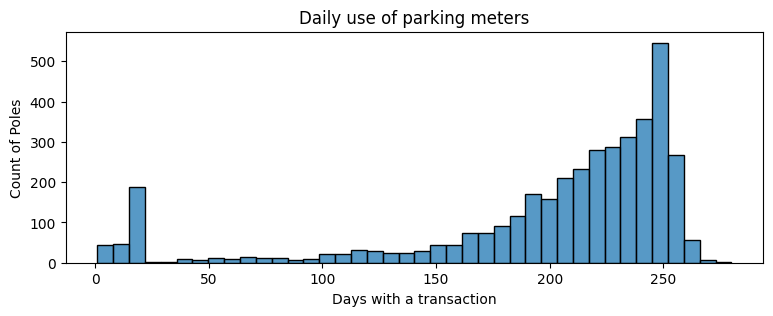

In [370]:
xyz_df = pd.DataFrame(df_2023['pole_id'].value_counts())
plt.figure(figsize=(9,3))
sns.histplot(xyz_df['count'])
plt.ylabel("Count of Poles")
plt.xlabel("Days with a transaction")
plt.title("Daily use of parking meters")

In [371]:
amount_df[(amount_df['isSunday'] == 0) & (amount_df['isHoliday'] == 0)]['transactions'].mean()

25372.665578069074

In [372]:
transactions_df[(transactions_df['isSunday'] == 0) & (transactions_df['isHoliday'] == 0)]['transactions'].mean()

17813.226460071513

In [388]:
transactions_df['month'] = transactions_df['date'].dt.month
transactions_df['year'] = transactions_df['date'].dt.year
transactions_df['weekday'] = transactions_df['date'].dt.dayofweek

xyz_df = pd.DataFrame(transactions_df.groupby(['year', 'weekday'])['transactions'].mean())

xyz_df.groupby('weekday')['transactions'].mean().mean()

14684.186335490303

In [387]:
amount_df['month'] = amount_df['date'].dt.month
amount_df['year'] = amount_df['date'].dt.year
amount_df['weekday'] = amount_df['date'].dt.dayofweek

xyz_df = pd.DataFrame(amount_df.groupby(['year', 'weekday'])['transactions'].mean())

xyz_df.groupby('weekday')['transactions'].mean() / 145871

20838.752092462302

In [378]:
amount_df['avg'] = (amount_df['transactions'] / transactions_df['transactions'])
transactionsdf['avg'] = (amount_df['transactions'] / transactions_df['transactions'])

In [385]:
xyz_df = pd.DataFrame(amount_df.groupby(['year', 'weekday'])['transactions'].mean())

xyz_df.groupby('weekday')['transactions'].mean().mean()

20838.752092462302

In [379]:
xyz_df = pd.DataFrame(amount_df.groupby(['year', 'weekday'])['avg'].mean())

xyz_df.groupby('weekday')['avg'].mean()

weekday
0    1.281001
1    1.386855
2    1.402609
3    1.365671
4    1.374761
5    1.477848
6    0.347310
Name: avg, dtype: float64

In [322]:
df_2023

,pole_id,month,day,sum_trans_amt,num_trans,year,date
0,1-1004,1,19,65,1,2023,2023-01-19
1,1-1004,1,20,990,7,2023,2023-01-20
2,1-1004,1,27,180,3,2023,2023-01-27
3,1-1004,1,28,1025,7,2023,2023-01-28
4,1-1004,1,30,1135,7,2023,2023-01-30
...,...,...,...,...,...,...,...
776279,WUV-119,11,21,615,6,2023,2023-11-21
776280,WUV-119,11,22,280,4,2023,2023-11-22
776281,WUV-119,11,24,235,4,2023,2023-11-24
776282,WUV-119,11,25,475,4,2023,2023-11-25


In [323]:
2500000 / 15000

166.66666666666666

In [329]:
df_2019

,pole_id,month,day,sum_trans_amt,num_trans,year,date
0,1-1004,1,1,3.05,3,2019,2019-01-01
1,1-1004,1,2,7.55,12,2019,2019-01-02
2,1-1004,1,3,6.10,11,2019,2019-01-03
3,1-1004,1,4,9.35,7,2019,2019-01-04
4,1-1004,1,5,7.10,7,2019,2019-01-05
...,...,...,...,...,...,...,...
1342741,WUV-119,12,26,4.00,3,2019,2019-12-26
1342742,WUV-119,12,27,3.60,4,2019,2019-12-27
1342743,WUV-119,12,28,2.50,1,2019,2019-12-28
1342744,WUV-119,12,30,3.25,2,2019,2019-12-30
